# Introduction

Hello everyone,

This noteboot is an assignment of CBD Robotics Intern to utilize my acknowledge. It entails two main sections.

***Cleaning data***, includes: dealing with missing data, outliers, scaling, and PCA.

***Building and Tuning Linear Regression*** to get the best predictions. 

In [1]:
import numpy as np 
import pandas as pd 
import scipy
import random
random.seed(10)
np.random.seed(11)
pd.set_option('display.max_columns', 500)

from scipy import stats
from scipy.stats import norm
import missingno as msno
import datetime
from pandas_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, Normalizer, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, validation_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

# Ploting libs

from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
#pio.renderers.default = "notebook" 
# As after installing vscode, renderer changed to vscode, 
# which made graphs no more showed in jupyter.

from yellowbrick.regressor import ResidualsPlot


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('RdBu')

/home/maihai/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [2]:
import ppscore as pps

In [3]:
from sklearn.metrics import roc_curve, auc

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.metrics import classification_report

# Take a look at the Dataset

In [4]:
df = pd.read_csv('~/Documents/0_Delay_Airlines/DelayedFlights.csv') #, nrows=20000)

In [5]:
print('Observations                 : ', df.shape[0])
print('Features -- exclude the Price: ', df.shape[1] - 1)

Observations                 :  1936758
Features -- exclude the Price:  29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [7]:
df.head(15)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,N263WN,52.0,50.0,37.0,11.0,9.0,IND,MDW,162,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


## Comments
* ***To drop***: Unnamed and Year. Unnamed column is a redundant index, and Year is constant.
* ***The Target***: ArrDelay. 

In [8]:
df.drop(['Unnamed: 0', 'Year'], axis=1, inplace=True)

# Choosing Columns to be Features

Not all of columns in the dataset are competence to be features59

In [9]:
df.drop(['DepTime', 'ArrTime', 
         'ActualElapsedTime', 'CRSElapsedTime',
         'AirTime', 'DepDelay', 
         'TaxiIn', 'TaxiOut', 
         'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

In [10]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ArrDelay', 'Origin', 'Dest',
       'Distance', 'Cancelled', 'CancellationCode', 'Diverted'],
      dtype='object')

# Binary Encode of ArrTime

In [11]:
# Binary Encode Function

## Threshold = 30 mins
def above_30_DELAYED(num):
    if np.isnan(num):
        return
    elif num < 30:
        return 0
    elif num >= 30: 
        return 1

df['Delayed'] = df.ArrDelay.apply(above_30_DELAYED)

## Diverted == 1 then ArrDelay = 1
df.Delayed[df.Diverted==1] = 1

## Cancelled == 1 then ArrDelay = 1
df.Delayed[df.Cancelled==1] = 1

In [12]:
df.drop('ArrDelay', axis=1, inplace=True)

# Missing Data

In [13]:
# A Brief of Missing data

total_miss   = df.isnull().sum().sort_values(ascending=False)

percent      = total_miss / df.shape[0]

table = pd.concat([total_miss, percent], axis=1, keys=['Numbers', 'Percent'])
print(table.head(8))

                  Numbers   Percent
TailNum                 5  0.000003
Delayed                 0  0.000000
Diverted                0  0.000000
CancellationCode        0  0.000000
Cancelled               0  0.000000
Distance                0  0.000000
Dest                    0  0.000000
Origin                  0  0.000000


In [14]:
# TailNum: drop missing
df.dropna(axis=0, subset=['TailNum'], inplace=True)

# Descriptive Statistic 

In [15]:
# Numeric
df.describe(percentiles=[0.01, 0.25, 0.75, 0.99])

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,Delayed
count,1.936753e+06,1.936753e+06,1.936753e+06,1.936753e+06,1.936753e+06,1.936753e+06,1.936753e+06,1.936753e+06,1.936753e+06,1.936753e+06
mean,6.111110e+00,1.575347e+01,3.984826e+00,1.467473e+03,1.634225e+03,2.184256e+03,7.656871e+02,3.268357e-04,4.002575e-03,4.437365e-01
std,3.482549e+00,8.776268e+00,1.995967e+00,4.247673e+02,4.646352e+02,1.944699e+03,5.744801e+02,1.807565e-02,6.313919e-02,4.968245e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
1%,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+02,4.500000e+01,2.100000e+01,8.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,6.100000e+02,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.705000e+03,1.543000e+03,6.060000e+02,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.014000e+03,3.422000e+03,9.980000e+02,0.000000e+00,0.000000e+00,1.000000e+00
99%,1.200000e+01,3.100000e+01,7.000000e+00,2.230000e+03,2.348000e+03,7.246000e+03,2.565000e+03,0.000000e+00,0.000000e+00,1.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,9.742000e+03,4.962000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Comments on Numerics
***Mistake Datatype***: 
* FlightNum should be categorical. 
* Month, DayofMont, DayofWeek, CRSDepTime, CRSArrTime, and CRSElapsedTime are datetime format, though being numeric are helpful somehow.
* Cancelled is binary.
 
***Distance***: the only true numeric here.

In [16]:
# Categories
df.describe(include='O').sort_values(axis=1, by=['unique'], ascending=False)

,TailNum,Dest,Origin,UniqueCarrier,CancellationCode
count,1936753,1936753,1936753,1936753,1936753
unique,5366,304,303,20,4
top,N325SW,ORD,ATL,WN,N
freq,965,108984,131613,377602,1936120


### Comments on Categories
Nothing much to say. We have more 300 airports, 20 carriers, 5366 aircrafts with responsive tail numbers.

2 000 000 * 0.001 = 2000 features are enough.

# Preprocessing Data for Tree-based Models

In [17]:
df_tree = df.copy()

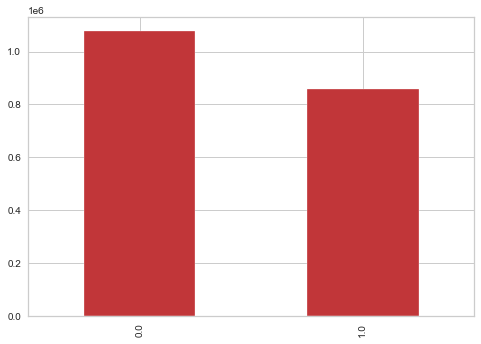

In [18]:
df.Delayed.value_counts().plot(kind='bar')

Bad news. We got a fair skewed data.

In [19]:
df_tree.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,Delayed
0,1,3,4,1955,2225,WN,335,N712SW,IAD,TPA,810,0,N,0,0.0
1,1,3,4,735,1000,WN,3231,N772SW,IAD,TPA,810,0,N,0,0.0
2,1,3,4,620,750,WN,448,N428WN,IND,BWI,515,0,N,0,0.0
3,1,3,4,1755,1925,WN,3920,N464WN,IND,BWI,515,0,N,0,1.0
4,1,3,4,1915,2110,WN,378,N726SW,IND,JAX,688,0,N,0,0.0


## Label Encoding

In [20]:
# Label Encoding
to_encode = ['UniqueCarrier', 'FlightNum', 'TailNum',
             'Origin', 'Dest', 'CancellationCode']

le = LabelEncoder()

for column in to_encode:
    df_tree[column] = le.fit_transform(df_tree[column])

In [21]:
df_tree.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,Delayed
0,1,3,4,1955,2225,17,333,3761,135,286,810,0,3,0,0.0
1,1,3,4,735,1000,17,3226,4121,135,286,810,0,3,0,0.0
2,1,3,4,620,750,17,446,1953,140,48,515,0,3,0,0.0
3,1,3,4,1755,1925,17,3915,2134,140,48,515,0,3,0,1.0
4,1,3,4,1915,2110,17,376,3844,140,150,688,0,3,0,0.0


In [22]:
df_tree.shape

(1936753, 15)

# Preprocessing Data for Non-Tree-based Models

In [23]:
df_nontree = df.copy()

## Outliers

### Detection by IQR Rule

***IQR Rule***  

This is a renowned technique to detecting outliers. To apply this rule, first we need to define several stuffs.

***Q1***: the quantile at 25%.

***Q3***: the quantile at 75%.

***IQR*** = Q3 - Q1.

Then, any value stands out of range **[Q1 - 1.5 IQR, Q3 + 1.5 IQR]** would be considered an outlier.

The IQR rule would be praticed on numerical features only.

In [24]:
df_nontree.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'Diverted', 'Delayed'],
      dtype='object')

There are only two columns to look for outliers: Distance and ArrDelay.

Though, Distances between airports, are fixed values. No matter how further from these airports to those airports, we had to include them into the dataset. None of Distance is an outliers.

Therefore, we only seeking for outliers in ArrDelay

In [25]:
# Searching for outliers
def IQR_outlier_detect(data, features=[]):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        outside_IQR = (data[feature]<=(Q1-1.5*IQR)) | ((Q3+1.5*IQR)<=data[feature])  
        outside_IQR = outside_IQR.sum()        
        
        print('Outside of IQR: %s -- Total: %d -- percent %2.2f'% (feature, outside_IQR, outside_IQR/df.shape[0]))
    return

# Remove outliers
def IQR_outlier_remove(data, features=[]):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # the core: the ~ is a must to avoid removing NaN.
        outside_IQR = (data[feature]<=(Q1-1.5*IQR)) | ((Q3+1.5*IQR)<=data[feature])
        data = data[~outside_IQR]
        print('Cleaning: ', feature)
        print('After cleaning, data left: %d \n' % (data.shape[0]))
    return data


## Normalization

In [26]:
df_nontree.sample(10)

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,Delayed
1173032,7,21,1,1258,1248,DL,1899,N957DL,ATL,BHM,134,0,N,0,0.0
1714723,11,11,2,1645,1800,AA,1339,N4XDAA,DCA,ORD,612,0,N,0,0.0
1627837,11,3,1,1950,2255,WN,3017,N495WN,MDW,ISP,765,0,N,0,0.0
604612,4,17,4,2010,2149,XE,2477,N19503,ORF,EWR,284,0,N,0,0.0
200032,2,14,4,1530,1815,WN,3323,N315SW,TPA,BDL,1111,0,N,0,0.0
1931575,12,2,2,600,1108,CO,162,N78509,ONT,IAH,1334,0,N,0,0.0
185747,2,4,1,1710,1955,WN,375,N727SW,LAX,ABQ,677,0,N,0,1.0
1433054,9,11,4,1740,2130,WN,1359,N424WN,MDW,TPA,997,0,N,0,0.0
1273766,8,9,6,1415,1545,WN,3378,N211WN,OAK,LAS,407,0,N,0,0.0
1621131,10,17,5,1700,1956,CO,319,N14120,TPA,EWR,998,0,N,0,1.0


In [27]:
df_nontree['Distance'] = MinMaxScaler().fit_transform(df_nontree['Distance'].values.reshape(-1, 1))

In [28]:
df_nontree.sample(10)

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,Delayed
229465,2,3,7,2145,2231,YV,2917,N927LR,ELP,LAS,0.115734,0,N,0,0.0
178412,1,8,2,1140,1319,CO,1487,N13248,MCO,IAH,0.170067,0,N,0,0.0
600433,4,2,3,1545,1631,XE,148,N27200,ABQ,ONT,0.125227,0,N,0,0.0
1057722,6,8,7,1640,2116,AS,124,N305AS,FAI,SEA,0.307413,0,N,0,1.0
1547740,10,17,5,1100,1307,XE,2734,N14974,STL,IAH,0.132700,0,N,0,0.0
404966,3,26,3,2110,5,WN,396,N314SW,STL,BWI,0.146637,0,N,0,1.0
759114,5,8,4,1900,1948,XE,110,N12552,ELP,ONT,0.133104,0,N,0,1.0
204076,2,18,1,1215,1705,WN,594,N440LV,LAS,MCI,0.228035,0,N,0,0.0
1579710,10,27,1,1255,2035,DL,1133,N640DL,SFO,ATL,0.429812,0,N,0,0.0
87489,1,18,5,1115,1919,US,734,N176UW,LAX,PHL,0.482731,0,N,0,0.0


## Cyclical Feature Engineering

In [29]:
df_nontree.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,Delayed
0,1,3,4,1955,2225,WN,335,N712SW,IAD,TPA,0.161382,0,N,0,0.0
1,1,3,4,735,1000,WN,3231,N772SW,IAD,TPA,0.161382,0,N,0,0.0
2,1,3,4,620,750,WN,448,N428WN,IND,BWI,0.101798,0,N,0,0.0
3,1,3,4,1755,1925,WN,3920,N464WN,IND,BWI,0.101798,0,N,0,1.0
4,1,3,4,1915,2110,WN,378,N726SW,IND,JAX,0.136740,0,N,0,0.0


In [30]:
df_nontree['Month_sin'] = np.sin(df.Month * (2 * np.pi/12))
df_nontree['Month_cos'] = np.cos(df.Month * (2 * np.pi/12))

df_nontree['DayofMonth_sin'] = np.sin(df.DayofMonth * (2 * np.pi/31))
df_nontree['DayofMonth_cos'] = np.cos(df.DayofMonth * (2 * np.pi/31))

df_nontree['DayOfWeek_sin'] = np.sin(df.DayOfWeek* (2 * np.pi/7))
df_nontree['DayOfWeek_cos'] = np.cos(df.DayOfWeek* (2 * np.pi/7))

df_nontree['CRSDepTime_sin'] = np.sin(df.CRSDepTime* (2 * np.pi/2400))
df_nontree['CRSDepTime_cos'] = np.cos(df.CRSDepTime* (2 * np.pi/2400))

df_nontree['CRSArrTime_sin'] = np.sin(df.CRSArrTime* (2 * np.pi/2400))
df_nontree['CRSArrTime_cos'] = np.cos(df.CRSArrTime* (2 * np.pi/2400))

In [31]:
df_nontree.drop(['Month', 'DayofMonth', 'DayOfWeek',
                 'CRSDepTime', 'CRSArrTime'],
                axis=1, inplace=True)

In [32]:
df_nontree.head()

,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,Delayed,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DayOfWeek_sin,DayOfWeek_cos,CRSDepTime_sin,CRSDepTime_cos,CRSArrTime_sin,CRSArrTime_cos
0,WN,335,N712SW,IAD,TPA,0.161382,0,N,0,0.0,0.5,0.866025,0.571268,0.820763,-0.433884,-0.900969,-0.918791,0.394744,-0.442289,0.896873
1,WN,3231,N772SW,IAD,TPA,0.161382,0,N,0,0.0,0.5,0.866025,0.571268,0.820763,-0.433884,-0.900969,0.938191,-0.346117,0.500000,-0.866025
2,WN,448,N428WN,IND,BWI,0.101798,0,N,0,0.0,0.5,0.866025,0.571268,0.820763,-0.433884,-0.900969,0.998630,-0.052336,0.923880,-0.382683
3,WN,3920,N464WN,IND,BWI,0.101798,0,N,0,1.0,0.5,0.866025,0.571268,0.820763,-0.433884,-0.900969,-0.993068,-0.117537,-0.946930,0.321439
4,WN,378,N726SW,IND,JAX,0.136740,0,N,0,0.0,0.5,0.866025,0.571268,0.820763,-0.433884,-0.900969,-0.955020,0.296542,-0.688355,0.725374


# One Hot Encoding

In [33]:
df_nontree.FlightNum.nunique()

7499

In [34]:
df_nontree.TailNum.nunique()

5366

In [35]:
df_nontree.drop(['FlightNum', 'TailNum'], axis=1, inplace=True)

In [36]:
# One hot encode
to_onehot = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']

#for column in to_onehot:
 #   df_nontree[column] = OneHotEncoder().fit_transform(df_nontree[column].values.reshape(-1, 1))
    
df_nontree = pd.get_dummies(df_nontree, columns=to_onehot, sparse=True)



In [37]:
df_nontree.sample(10)

,Distance,Cancelled,Diverted,Delayed,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DayOfWeek_sin,DayOfWeek_cos,CRSDepTime_sin,CRSDepTime_cos,CRSArrTime_sin,CRSArrTime_cos,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,...,Dest_CIC,Dest_CID,Dest_CLD,Dest_CLE,Dest_CLL,Dest_CLT,Dest_CMH,Dest_CMI,Dest_CMX,Dest_COD,Dest_COS,Dest_CPR,Dest_CRP,Dest_CRW,Dest_CSG,Dest_CVG,Dest_CWA,Dest_CYS,Dest_DAB,Dest_DAL,Dest_DAY,Dest_DBQ,Dest_DCA,Dest_DEN,Dest_DFW,Dest_DHN,Dest_DLG,Dest_DLH,Dest_DRO,Dest_DSM,Dest_DTW,Dest_EGE,Dest_EKO,Dest_ELM,Dest_ELP,Dest_ERI,Dest_EUG,Dest_EVV,Dest_EWN,Dest_EWR,Dest_EYW,Dest_FAI,Dest_FAR,Dest_FAT,Dest_FAY,Dest_FCA,Dest_FLG,Dest_FLL,Dest_FLO,Dest_FNT,Dest_FSD,Dest_FSM,Dest_FWA,Dest_GCC,Dest_GEG,Dest_GFK,Dest_GGG,Dest_GJT,Dest_GNV,Dest_GPT,Dest_GRB,Dest_GRK,Dest_GRR,Dest_GSO,Dest_GSP,Dest_GST,Dest_GTF,Dest_GTR,Dest_GUC,Dest_HDN,Dest_HHH,Dest_HLN,Dest_HNL,Dest_HOU,Dest_HPN,Dest_HRL,Dest_HSV,Dest_HTS,Dest_IAD,Dest_IAH,Dest_ICT,Dest_IDA,Dest_ILM,Dest_IND,Dest_INL,Dest_IPL,Dest_ISP,Dest_ITH,Dest_ITO,Dest_IYK,Dest_JAC,Dest_JAN,Dest_JAX,Dest_JFK,Dest_JNU,Dest_KOA,Dest_KTN,Dest_LAN,Dest_LAS,Dest_LAW,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MD

# Train Test Splitting

In [38]:
sub_tree = df_tree.sample(frac=0.05, random_state=10, axis=0)

sub_ntree = df_nontree.sample(frac=0.05, random_state=10, axis=0)

In [39]:
sub_ntree.shape

(96838, 645)

In [40]:
sub_tree.shape

(96838, 15)

In [41]:
X_tree = sub_tree.drop('Delayed', axis=1).values 
y_tree = sub_tree['Delayed'].values


In [42]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree,
                                                                        test_size=0.6,
                                                                        random_state=11,
                                                                        stratify=y_tree)


In [43]:
X_ntree = sub_ntree.drop('Delayed', axis=1).values
y_ntree = sub_ntree['Delayed'].values

In [44]:
X_train_ntree, X_test_ntree, y_train_ntree, y_test_ntree = train_test_split(X_ntree, y_ntree,
                                                                                    test_size=0.6,
                                                                                    random_state=11,
                                                                                    stratify=y_ntree)

# Models

## Gini Score to Evaluate Performances

In [45]:
# Gini score = 2*auc -1
# to evaluate performances of models

def gini_coef(y_test, y_pred):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    gini_coef = 2 * roc_auc - 1
    
    print('Gini score: %5.4f' %(gini_coef))
    
    return gini_coef

In [46]:
# Summary table to compare models performance
summary = {}


## Decision Tree

In [47]:
# Decision Tree Baseline

model = DecisionTreeClassifier()
model.fit(X_train_tree, y_train_tree)
predict = model.predict(X_test_tree)

print(classification_report(y_test_tree, predict))
model_gini = gini_coef(y_test_tree, predict)

summary['DecisionTreeClassifier'] = model_gini

              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58     32335
         1.0       0.48      0.48      0.48     25768

    accuracy                           0.54     58103
   macro avg       0.53      0.53      0.53     58103
weighted avg       0.54      0.54      0.54     58103

Gini score: 0.0635


Text(0, 0.5, 'AUC score')

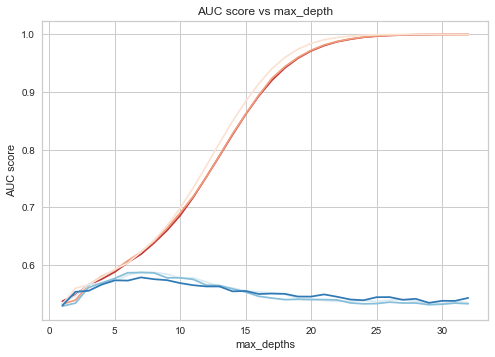

In [48]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
params = max_depths

model = DecisionTreeClassifier()

train_scores, test_scores = validation_curve(
                                model,
                                X = X_train_tree, y = y_train_tree, 
                                param_name = 'max_depth', 
                                param_range = params, 
                                scoring='roc_auc',
                                cv = 3,
                                n_jobs=-1)

plt.plot(params, train_scores)
plt.plot(params, test_scores)
plt.title('AUC score vs max_depth')
plt.xlabel('max_depths')
plt.ylabel('AUC score')

Depth sau qua chi to overfit.

Text(0, 0.5, 'AUC score')

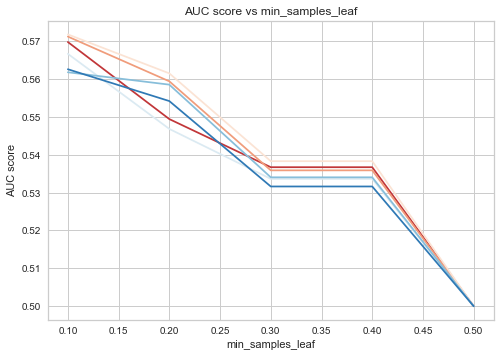

In [49]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
params = min_samples_leafs

model = DecisionTreeClassifier()

train_scores, test_scores = validation_curve(
                                model,
                                X = X_train_tree, y = y_train_tree, 
                                param_name = 'min_samples_leaf', 
                                param_range = params, 
                                scoring='roc_auc',
                                cv = 3,
                                n_jobs=-1)

plt.plot(params, train_scores)
plt.plot(params, test_scores)
plt.title('AUC score vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC score')

It seems like that Min samples leaf does not affect the Decision tree so much.

Text(0, 0.5, 'AUC score')

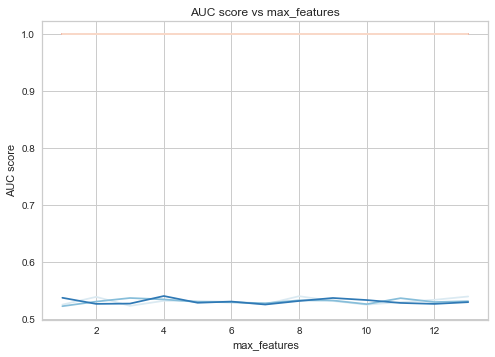

In [50]:
max_features = list(range(1,X_train_tree.shape[1]))
params = max_features

model = DecisionTreeClassifier()

train_scores, test_scores = validation_curve(
                                model,
                                X = X_train_tree, y = y_train_tree, 
                                param_name = 'max_features', 
                                param_range = params, 
                                scoring='roc_auc',
                                cv = 3,
                                n_jobs=-1)

plt.plot(params, train_scores)
plt.plot(params, test_scores)
plt.title('AUC score vs max_features')
plt.xlabel('max_features')
plt.ylabel('AUC score')

In [51]:
params = {'max_depth'        : np.linspace(1, 32, 32, endpoint=True),
          'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
          'max_features'     : list(range(1,X_train_tree.shape[1]))}
model = DecisionTreeClassifier()

tuner = GridSearchCV(model, params, 
                    scoring='roc_auc', cv=3,
                    n_jobs=-1)
tuner.fit(X_train_tree, y_train_tree)
predict = tuner.predict(X_test_tree)

print(tuner.best_params_)
tuner_gini = gini_coef(y_test_tree, predict)

summary['DecisionTreeClassifier Tuned'] = tuner_gini
print(summary)

{'max_depth': 5.0, 'max_features': 13, 'min_samples_leaf': 0.1}
Gini score: 0.0513
{'DecisionTreeClassifier': 0.06347067146284235, 'DecisionTreeClassifier Tuned': 0.05132304134087584}


from sklearn.tree import export_graphviz

export_graphviz( 
 gsCV.best_estimator_,
 out_file=('moons_tree.dot'),
 feature_names=None,
 class_names=None,
 filled=True,
)

## Random Forest

In [53]:
# Random Forest Baseline

model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(X_train_tree, y_train_tree)
predict = model.predict(X_test_tree)

print(classification_report(y_test_tree, predict))
model_gini = gini_coef(y_test_tree, predict)

summary['RandomForestClassifier'] = model_gini
print(summary)

              precision    recall  f1-score   support

         0.0       0.60      0.85      0.70     32335
         1.0       0.60      0.28      0.38     25768

    accuracy                           0.60     58103
   macro avg       0.60      0.56      0.54     58103
weighted avg       0.60      0.60      0.56     58103

Gini score: 0.1294
{'DecisionTreeClassifier': 0.06347067146284235, 'DecisionTreeClassifier Tuned': 0.05132304134087584, 'RandomForestClassifier': 0.12936212899852606}


Too bad to hande. :(

In [55]:
# Random Forest Tuning

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

model = RandomForestClassifier()

tuner = RandomizedSearchCV(estimator=model, 
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=3,
                             random_state=0,
                             verbose=2,
                             n_jobs=-1)
tuner.fit(X_train_tree, y_train_tree)
predict = tuner.predict(X_test_tree)

print(tuner.best_params_)
tuner_gini = gini_coef(y_test_tree, predict)

summary['RandomForestClassifier Tuned'] = tuner_gini
print(summary)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 52.8min finished


{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
Gini score: 0.1671
{'DecisionTreeClassifier': 0.06347067146284235, 'DecisionTreeClassifier Tuned': 0.08782813224083652, 'RandomForestClassifier': 0.12936212899852606, 'RandomForestClassifier Tuned': 0.16708207820498377}


In [ ]:
rf_tuned = RandomForestClassifier(n_estimators=1800,
                                  min_samples_split=5,
                                  min_samples_leaf=4,
                                  max_features='auto',
                                  max_depth100,
                                  bootstrap=True)

## Gradient Boosting

In [57]:
# Gradient Boosting Baseline

model = GradientBoostingClassifier()
model.fit(X_train_tree, y_train_tree)
predict = model.predict(X_test_tree)

print(classification_report(y_test_tree, predict))
model_gini = gini_coef(y_test_tree, predict)

summary['GradientBoostingClassifier'] = model_gini
print(summary)

              precision    recall  f1-score   support

         0.0       0.61      0.81      0.70     32335
         1.0       0.59      0.34      0.43     25768

    accuracy                           0.60     58103
   macro avg       0.60      0.58      0.56     58103
weighted avg       0.60      0.60      0.58     58103

Gini score: 0.1557
{'DecisionTreeClassifier': 0.06347067146284235, 'DecisionTreeClassifier Tuned': 0.08782813224083652, 'RandomForestClassifier': 0.12936212899852606, 'RandomForestClassifier Tuned': 0.16708207820498377, 'GradientBoostingClassifier': 0.1556645848502609}


In [58]:
# Gradient Boosting Tuning

## Params
random_grid = {'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
               'n_estimators'   : [1, 2, 4, 8, 16, 32, 64, 100, 200],
               
               'max_features'   : list(range(1,X_train_tree.shape[1])),
               'max_depth'      : np.linspace(1, 32, 32, endpoint=True),
               
               'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
               'min_samples_leaf' : [1, 2, 4]}

model = GradientBoostingClassifier()

# Tuning
tuner = RandomizedSearchCV(estimator=model, 
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=3,
                             random_state=0,
                             verbose=2,
                             n_jobs=-1)
tuner.fit(X_train_tree, y_train_tree)
predict = tuner.predict(X_test_tree)

# Output to screen
print(tuner.best_params_)
tuner_gini = gini_coef(y_test_tree, predict)

# To final comparition
summary['GradientBoostingClassifier Tuned'] = tuner_gini

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


{'n_estimators': 100, 'min_samples_split': 0.2, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': 18.0, 'learning_rate': 0.1}
Gini score: 0.1612


## LightGBM


In [59]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [60]:
# LightGBM Baseline

model = LGBMClassifier()
model.fit(X_train_tree, y_train_tree)
predict = model.predict(X_test_tree)

print(classification_report(y_test_tree, predict))
model_gini = gini_coef(y_test_tree, predict)

summary['LGBMClassifier'] = model_gini
print(summary)

              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69     32335
         1.0       0.60      0.41      0.49     25768

    accuracy                           0.62     58103
   macro avg       0.61      0.60      0.59     58103
weighted avg       0.61      0.62      0.60     58103

Gini score: 0.1905
{'DecisionTreeClassifier': 0.06347067146284235, 'DecisionTreeClassifier Tuned': 0.08782813224083652, 'RandomForestClassifier': 0.12936212899852606, 'RandomForestClassifier Tuned': 0.16708207820498377, 'GradientBoostingClassifier': 0.1556645848502609, 'GradientBoostingClassifier Tuned': 0.16120749664177625, 'LGBMClassifier': 0.19051880521398568}


In [61]:
# LightGBM Tuning

## Params
random_grid = {'boosting_type' : ['dart', 'gbdt', 'goss'],
               'max_bin'       : range(1, 10),
               'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.005, 0.001],
               'n_estimators'  : [10, 30, 100, 300, 500],
               'num_leaves'    : [20, 30, 40, 50, 60]}

model = LGBMClassifier()

# Tuning
tuner = RandomizedSearchCV(estimator=model, 
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=3,
                             random_state=0,
                             verbose=2,
                             n_jobs=-1)
tuner.fit(X_train_tree, y_train_tree)
predict = tuner.predict(X_test_tree)

# Output to screen
print(tuner.best_params_)
tuner_gini = gini_coef(y_test_tree, predict)

# To final comparition
summary['LGBMClassifier Tuned'] = tuner_gini

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


{'num_leaves': 20, 'n_estimators': 500, 'max_bin': 9, 'learning_rate': 0.1, 'boosting_type': 'dart'}
Gini score: 0.1592


In [62]:
# LightGBM Tuning

## Params
random_grid = {'max_depth' : [-1, 10, 20, 30, 50, 100],
               'num_leaves'    : [20, 30, 40, 50, 60],
               
               # At nodes
               'min_gain_to_split': ,
               'min_data_in_leaf' : [2, 5, 10, 20, 30, 50],
               'min_child_weight' : ,
               'min_child_samples': ,
    
    
    'boosting_type' : ['dart', 'gbdt', 'goss'],
               'max_bin'       : range(1, 10),
               'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.005, 0.001],
               'n_estimators'  : [10, 30, 100, 300, 500],
               }

model = LGBMClassifier()

# Tuning
tuner = RandomizedSearchCV(estimator=model, 
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=3,
                             random_state=0,
                             verbose=2,
                             n_jobs=-1)
tuner.fit(X_train_tree, y_train_tree)
predict = tuner.predict(X_test_tree)

# Output to screen
print(tuner.best_params_)
tuner_gini = gini_coef(y_test_tree, predict)

# To final comparition
summary['LGBMClassifier Tuned'] = tuner_gini

SyntaxError: invalid syntax (<ipython-input-62-930c262bad18>, line 8)

## Naive Bayes

In [63]:
# GaussianNB Baseline

model = GaussianNB()
model.fit(X_train_tree, y_train_tree)
predict = model.predict(X_test_tree)

print(classification_report(y_test_tree, predict))
model_gini = gini_coef(y_test_tree, predict)

summary['GaussianNB'] = model_gini
print(summary)

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72     32335
         1.0       1.00      0.01      0.02     25768

    accuracy                           0.56     58103
   macro avg       0.78      0.51      0.37     58103
weighted avg       0.75      0.56      0.41     58103

Gini score: 0.0102
{'DecisionTreeClassifier': 0.06347067146284235, 'DecisionTreeClassifier Tuned': 0.08782813224083652, 'RandomForestClassifier': 0.12936212899852606, 'RandomForestClassifier Tuned': 0.16708207820498377, 'GradientBoostingClassifier': 0.1556645848502609, 'GradientBoostingClassifier Tuned': 0.16120749664177625, 'LGBMClassifier': 0.19051880521398568, 'LGBMClassifier Tuned': 0.1591612051670921, 'GaussianNB': 0.010245265445513851}


In [65]:
# BernoulliNB Baseline

model = BernoulliNB()
model.fit(X_train_tree, y_train_tree)
predict = model.predict(X_test_tree)

print(classification_report(y_test_tree, predict))
model_gini = gini_coef(y_test_tree, predict)

summary['BernoulliNB'] = model_gini
print(summary)

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72     32335
         1.0       0.92      0.01      0.02     25768

    accuracy                           0.56     58103
   macro avg       0.74      0.51      0.37     58103
weighted avg       0.72      0.56      0.41     58103

Gini score: 0.0112
{'DecisionTreeClassifier': 0.06347067146284235, 'DecisionTreeClassifier Tuned': 0.08782813224083652, 'RandomForestClassifier': 0.12936212899852606, 'RandomForestClassifier Tuned': 0.16708207820498377, 'GradientBoostingClassifier': 0.1556645848502609, 'GradientBoostingClassifier Tuned': 0.16120749664177625, 'LGBMClassifier': 0.19051880521398568, 'LGBMClassifier Tuned': 0.1591612051670921, 'GaussianNB': 0.010245265445513851, 'BernoulliNB': 0.01122634306994641}


## Logistic Regression

In [66]:
# LogisticRegression Baseline

model = LogisticRegression()
model.fit(X_train_tree, y_train_tree)
predict = model.predict(X_test_tree)

print(classification_report(y_test_tree, predict))
model_gini = gini_coef(y_test_tree, predict)

summary['LogisticRegression'] = model_gini
print(summary)

              precision    recall  f1-score   support

         0.0       0.57      0.87      0.69     32335
         1.0       0.53      0.19      0.28     25768

    accuracy                           0.56     58103
   macro avg       0.55      0.53      0.48     58103
weighted avg       0.55      0.56      0.51     58103

Gini score: 0.0528
{'DecisionTreeClassifier': 0.06347067146284235, 'DecisionTreeClassifier Tuned': 0.08782813224083652, 'RandomForestClassifier': 0.12936212899852606, 'RandomForestClassifier Tuned': 0.16708207820498377, 'GradientBoostingClassifier': 0.1556645848502609, 'GradientBoostingClassifier Tuned': 0.16120749664177625, 'LGBMClassifier': 0.19051880521398568, 'LGBMClassifier Tuned': 0.1591612051670921, 'GaussianNB': 0.010245265445513851, 'BernoulliNB': 0.01122634306994641, 'LogisticRegression': 0.052847187260309125}


In [69]:
# Logistic Regression Tuning

## Params
random_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty': ['l1', 'l2', 'elastic'],
        'C'      : [100, 10, 1.0, 0.1, 0.01],
        'max_iter' : [100, 200, 300, 500]}
model = LogisticRegression()

# Tuning
tuner = RandomizedSearchCV(estimator=model, 
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=3,
                             random_state=0,
                             verbose=2,
                             n_jobs=-1)
tuner.fit(X_train_ntree, y_train_ntree)
predict = tuner.predict(X_test_ntree)

# Output to screen
print(tuner.best_params_)
tuner_gini = gini_coef(y_test_ntree, predict)

# To final comparition
summary['LogisticRegression Tuned'] = tuner_gini

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.0min finished


{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.1}
Gini score: 0.1517


## SVM

In [70]:
# SVC Baseline

model = SVC()
model.fit(X_train_tree, y_train_tree)
predict = model.predict(X_test_tree)

print(classification_report(y_test_tree, predict))
model_gini = gini_coef(y_test_tree, predict)

summary['SVC'] = model_gini
print(summary)

              precision    recall  f1-score   support

         0.0       0.57      0.94      0.71     32335
         1.0       0.56      0.10      0.17     25768

    accuracy                           0.57     58103
   macro avg       0.56      0.52      0.44     58103
weighted avg       0.56      0.57      0.47     58103

Gini score: 0.0366
{'DecisionTreeClassifier': 0.06347067146284235, 'DecisionTreeClassifier Tuned': 0.08782813224083652, 'RandomForestClassifier': 0.12936212899852606, 'RandomForestClassifier Tuned': 0.16708207820498377, 'GradientBoostingClassifier': 0.1556645848502609, 'GradientBoostingClassifier Tuned': 0.16120749664177625, 'LGBMClassifier': 0.19051880521398568, 'LGBMClassifier Tuned': 0.1591612051670921, 'GaussianNB': 0.010245265445513851, 'BernoulliNB': 0.01122634306994641, 'LogisticRegression': 0.052847187260309125, 'LogisticRegression Tuned': 0.15168337741434823, 'SVC': 0.036646575331680475}


In [71]:
# SVC Tuning

## Params
random_grid = {'kernel' : ['poly', 'rbf', 'sigmoid'],
        'max_iter' : [100, 200, 300, 500],
        'gamma'  : ['scale', 'auto'],
        'C'      : [100, 50, 10, 1.0, 0.1, 0.01]}

model = SVC()

## Tuning
tuner = RandomizedSearchCV(estimator=model, 
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=3,
                             random_state=0,
                             verbose=2,
                             n_jobs=-1)
tuner.fit(X_train_tree, y_train_tree)
predict = tuner.predict(X_test_tree)

## Output to screen
print(tuner.best_params_)
tuner_gini = gini_coef(y_test_tree, predict)

## To final comparition
summary['SVC Tuned'] = tuner_gini

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   44.9s finished


{'max_iter': 200, 'kernel': 'rbf', 'gamma': 'scale', 'C': 100}
Gini score: -0.0146


# Comparation of Performance

In [83]:
table = pd.DataFrame(summary, index=[0]).T

table.to_csv('ComparisionOfPerformances.csv',  float_format='%5.4f')

In [91]:
table.columns = ['Gini score']

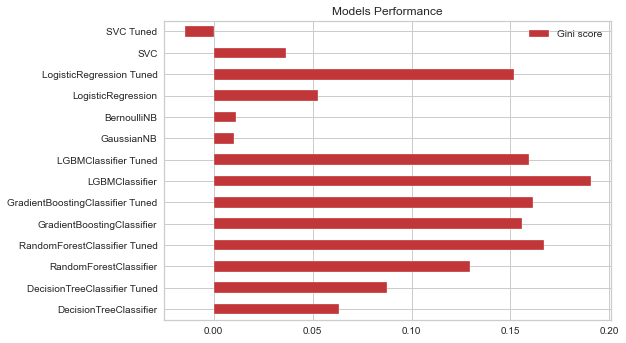

In [92]:
table.plot(kind='barh',
           title='Models Performance')

Vẽ đồ thị - bar - gini score của các model vào đây

# Why models are Good or Bad 


# How to Improve

# Feature Selection

https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py

In [ ]:
# PCA

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_refit_callable.html#sphx-glr-auto-examples-model-selection-plot-grid-search-refit-callable-py

In [ ]:
# SelectKBest

In [ ]:
# RFE - Recursive feature elimination